In [1]:
'''Import packages for loading data, analysing, and plotting'''

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import matplotlib as mpl
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma


import os
import matplotlib.colors as colors

import scipy
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
# define filenames and their directories

directory = '../../../../Documents/ModellingData'



AMOC variables:
- 'amoc_amo_lag_cor'
- 'amoc_mean_ann'
- 'amoc_pattern_ann'
- 'amoc_spectra_ann'
- 'amoc_sst_regression_ann'
- 'amoc_stddev_ann'
- 'amoc_tas_regression_ann'
- 'amoc_timeseries_ann'

LIG models:
- CESM2 -> a1 = lig127k, b1 = piControl
- FGOALS-f3-L -> a2 = lig127k, b2 = piControl --> piControl run has no AMOC: Chris said to use parts of historical run as proxy
- GISS-E2-1-G -> a3 = lig127k, b3 = piControl
- IPSL-CM6A-LR -> a4 = lig127k, b4 = piControl

In [3]:
# CESM2 LIG -> a1

filename_a1 = '%s/CESM2_lig127k.cvdp_data.1-700.nc'%directory

# load files via xarray

expt_a1_file = xr.open_dataset(filename_a1,decode_times=False)

lat_a1 = expt_a1_file['lat_amoc']
lon_a1 = expt_a1_file['lon']
depth_a1 = expt_a1_file['lev']
time_a1 = expt_a1_file['time']
time_lag_a1 = expt_a1_file['time_lag_cor']
amoc_amo_lag_cor_a1 = expt_a1_file['amoc_amo_lag_cor']


/Users/sophiesax/anaconda3/lib/python3.8/site-packages/xarray/conventions.py:490: SerializationWarning: variable 'nino34_autocorrelation' has multiple fill values {-1073741800.0, 1e+30}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [4]:
# CESM piControl -> b1

filename_b1 = '%s/CESM2_piControl.cvdp_data.701-1200.nc'%directory

# load files via xarray

expt_b1_file = xr.open_dataset(filename_b1,decode_times=False)

lat_b1 = expt_b1_file['lat_amoc']
lon_b1 = expt_b1_file['lon']
depth_b1 = expt_b1_file['lev']
time_b1 = expt_b1_file['time']
time_lag_b1 = expt_b1_file['time_lag_cor']
amoc_amo_lag_cor_b1 = expt_b1_file['amoc_amo_lag_cor']


In [5]:
# FGOALS-f3-L LIG -> a2

filename_a2 = '%s/FGOALS-f3-L_lig127k.cvdp_data.700-1199.nc'%directory

# load files via xarray

expt_a2_file = xr.open_dataset(filename_a2,decode_times=False)

lat_a2 = expt_a2_file['lat_amoc']
lon_a2 = expt_a2_file['lon']
depth_a2 = expt_a2_file['lev']
time_a2 = expt_a2_file['time']
time_lag_a2 = expt_a2_file['time_lag_cor']
amoc_amo_lag_cor_a2 = expt_a2_file['amoc_amo_lag_cor']


In [6]:
# GISS-E2-1-G LIG -> a3

filename_a3 = '%s/GISS-E2-1-G_lig127k.cvdp_data.2900-2999.nc'%directory

# load files via xarray

expt_a3_file = xr.open_dataset(filename_a3,decode_times=False)

lat_a3 = expt_a3_file['lat_amoc']
lon_a3 = expt_a3_file['lon']
depth_a3 = expt_a3_file['lev']
time_a3 = expt_a3_file['time']
time_lag_a3 = expt_a3_file['time_lag_cor']
amoc_amo_lag_cor_a3 = expt_a3_file['amoc_amo_lag_cor']


In [7]:
# GISS-E2-1-G piControl -> b3

filename_b3 = '%s/GISS-E2-1-G_piControl.cvdp_data.4150-5000.nc'%directory

# load files via xarray

expt_b3_file = xr.open_dataset(filename_b3,decode_times=False)

lat_b3 = expt_b3_file['lat_amoc']
lon_b3 = expt_b3_file['lon']
depth_b3 = expt_b3_file['lev']
time_b3 = expt_b3_file['time']
time_lag_b3 = expt_b3_file['time_lag_cor']
amoc_amo_lag_cor_b3 = expt_b3_file['amoc_amo_lag_cor']


In [8]:
# IPSL-CM6A-LR LIG -> a4

filename_a4 = '%s/IPSL-CM6A-LR_lig127k.cvdp_data.1850-2399.nc'%directory

# load files via xarray

expt_a4_file = xr.open_dataset(filename_a4,decode_times=False)

lat_a4 = expt_a4_file['lat_amoc']
lon_a4 = expt_a4_file['lon']
depth_a4 = expt_a4_file['lev']
time_a4 = expt_a4_file['time']
time_lag_a4 = expt_a4_file['time_lag_cor']
amoc_amo_lag_cor_a4 = expt_a4_file['amoc_amo_lag_cor']


In [9]:
# IPSL-CM6A-LR piControl -> b4

filename_b4 = '%s/IPSL-CM6A-LR_piControl.cvdp_data.1850-3049.nc'%directory

# load files via xarray

expt_b4_file = xr.open_dataset(filename_b4,decode_times=False)

lat_b4 = expt_b4_file['lat_amoc']
lon_b4 = expt_b4_file['lon']
depth_b4 = expt_b4_file['lev']
time_b4 = expt_b4_file['time']
time_lag_b4 = expt_b4_file['time_lag_cor']
amoc_amo_lag_cor_b4 = expt_b4_file['amoc_amo_lag_cor']


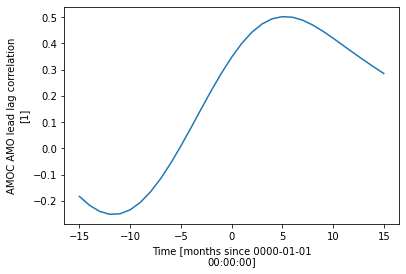

In [10]:
amoc_amo_lag_cor_a1.plot()

In [11]:
amoc_amo_lag_cor_a1

<xarray.DataArray 'amoc_amo_lag_cor' (time_lag_cor: 31)>
array([-0.18302 , -0.216958, -0.240238, -0.251316, -0.249339, -0.234117,
       -0.206068, -0.166144, -0.115759, -0.056712,  0.008877,  0.078627,
        0.14997 ,  0.220233,  0.286754,  0.347009,  0.399904,  0.442652,
        0.47411 ,  0.493833,  0.502091,  0.499829,  0.488551,  0.470144,
        0.446669,  0.42013 ,  0.392262,  0.364362,  0.337195,  0.310981,
        0.285457], dtype=float32)
Coordinates:
  * time_lag_cor  (time_lag_cor) int32 -15 -14 -13 -12 -11 ... 11 12 13 14 15
Attributes:
    long_name:  AMOC AMO lead lag correlation
    units:      1

In [12]:
time_lag_a1

<xarray.DataArray 'time_lag_cor' (time_lag_cor: 31)>
array([-15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,
        -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15], dtype=int32)
Coordinates:
  * time_lag_cor  (time_lag_cor) int32 -15 -14 -13 -12 -11 ... 11 12 13 14 15
Attributes:
    calendar:       standard
    standard_name:  time
    long_name:      Time
    units:          months since 0000-01-01 00:00:00

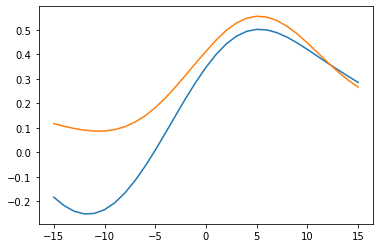

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time_lag_a1, amoc_amo_lag_cor_a1)
ax.plot(time_lag_a1, amoc_amo_lag_cor_b1)

<ipython-input-18-51a16d180a28>:30: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([l1, l2], labels = line_labels, loc = "lower center", borderaxespad = 0.1, ncol = 2, fontsize = 14)


[Text(0, 0.5, 'AMOC AMO lead lag correlation'),
 Text(0, 0.5, 'AMOC AMO lead lag correlation')]

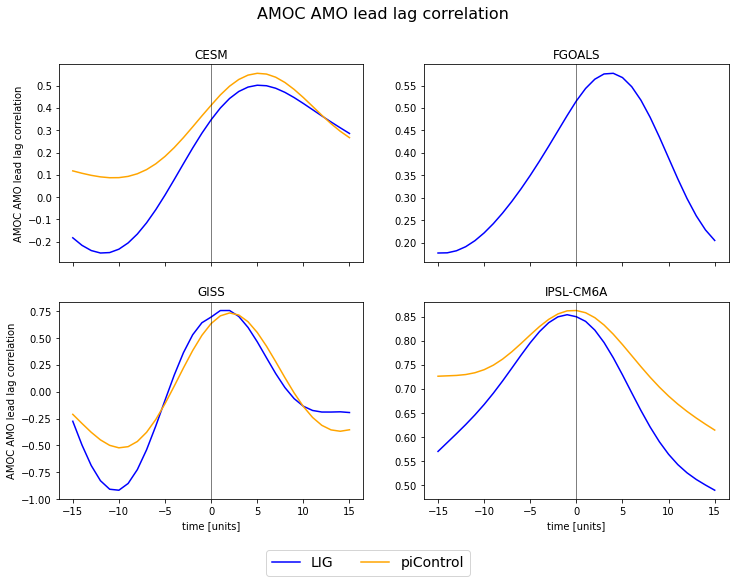

In [18]:
fig, axs = plt.subplots(2, 2, sharex = 'col', figsize = (12, 8), gridspec_kw = {'wspace':0.2})
(ax1, ax2), (ax3, ax4) = axs
fig.suptitle('AMOC AMO lead lag correlation', fontsize = 16)


# Labels to use in the legend for each line
line_labels = ["LIG", "piControl"]

# Create the sub-plots

l1 = ax1.plot(time_lag_a1, amoc_amo_lag_cor_a1, color = "blue")
l2 = ax1.plot(time_lag_b1, amoc_amo_lag_cor_b1, color = "orange")
l3 = ax2.plot(time_lag_a2, amoc_amo_lag_cor_a2, color = "blue")
l4 = ax3.plot(time_lag_a3, amoc_amo_lag_cor_a3, color = "blue")
l5 = ax3.plot(time_lag_b3, amoc_amo_lag_cor_b3, color = "orange")
l6 = ax4.plot(time_lag_a4, amoc_amo_lag_cor_a4, color = "blue")
l7 = ax4.plot(time_lag_b4, amoc_amo_lag_cor_b4, color = "orange")

ax1.axvline(x=0.0, color = "black", linewidth = 0.5)
ax2.axvline(x=0.0, color = "black", linewidth = 0.5)
ax3.axvline(x=0.0, color = "black", linewidth = 0.5)
ax4.axvline(x=0.0, color = "black", linewidth = 0.5)

ax1.set_title('CESM')
ax2.set_title('FGOALS')
ax3.set_title('GISS')
ax4.set_title('IPSL-CM6A')

# Create the legend
fig.legend([l1, l2], labels = line_labels, loc = "lower center", borderaxespad = 0.1, ncol = 2, fontsize = 14)

plt.setp(axs[-1, :], xlabel='time [units]')
plt.setp(axs[:, 0], ylabel='AMOC AMO lead lag correlation')

#plt.savefig('AMOC_AMO_lag_cor.png')